In [2]:
#import comat
import comat2

In [3]:
import numpy as np
import time
from scipy.linalg import toeplitz, solve_toeplitz

In [4]:
size = 3000
a = np.random.rand(size)
a[0] = np.abs(a[0]) + size # make sure it is positive definite

y = np.random.rand(size).astype(np.float64)


In [5]:
# Brute force
def logdet_quad_BF(corr_list, data):
    # Add parameter validation
    if np.any(np.isnan(corr_list)) or np.any(np.isinf(corr_list)):
        return -np.inf
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        return -np.inf
        
    try:
        result = np.dot(data, np.linalg.solve(toeplitz(corr_list), data)) + np.linalg.slogdet(toeplitz(corr_list))[1]
        return -0.5 * result
    except:
        return -np.inf


def logdet_quad_slogdet(corr_list, data):
    # Add parameter validation
    if np.any(np.isnan(corr_list)) or np.any(np.isinf(corr_list)):
        return -np.inf
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        return -np.inf
        
    try:
        result = np.dot(data, solve_toeplitz(corr_list, data)) + np.linalg.slogdet(toeplitz(corr_list))[1]
        return -0.5 * result
    except:
        return -np.inf

In [6]:
from timeit import timeit

def generate_inputs(size):
    a = np.random.rand(size)
    a[0] = np.abs(a[0]) + size # make sure it is positive definite

    y = np.random.rand(size).astype(np.float64)
    return a, y

# Updated benchmarking function
def benchmark(func, inputs):
    matrix, vector = inputs
    num_runs = int(51200/len(matrix))
    return timeit(lambda: func(matrix, vector), number=num_runs) / num_runs

# Benchmark the function speed - compare the running time of these three functions: (1) logdet_quad_BF, (2) logdet_quad_slogdet, (3) comat2.logdet_quad (my implementation)

size_list = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200]
times_bf, times_slog, times_comat = [], [], []

for n in size_list:
    inputs = generate_inputs(n)
    
    times_bf.append(benchmark(logdet_quad_BF, inputs))
    times_slog.append(benchmark(logdet_quad_slogdet, inputs))
    # times_comat1.append(benchmark(comat.logdet_quad, inputs))
    times_comat.append(benchmark(comat2.logdet_quad, inputs))



In [8]:
import matplotlib.pyplot as plt

# %matplotlib inline
# plt.style.use('seaborn-v0_8')

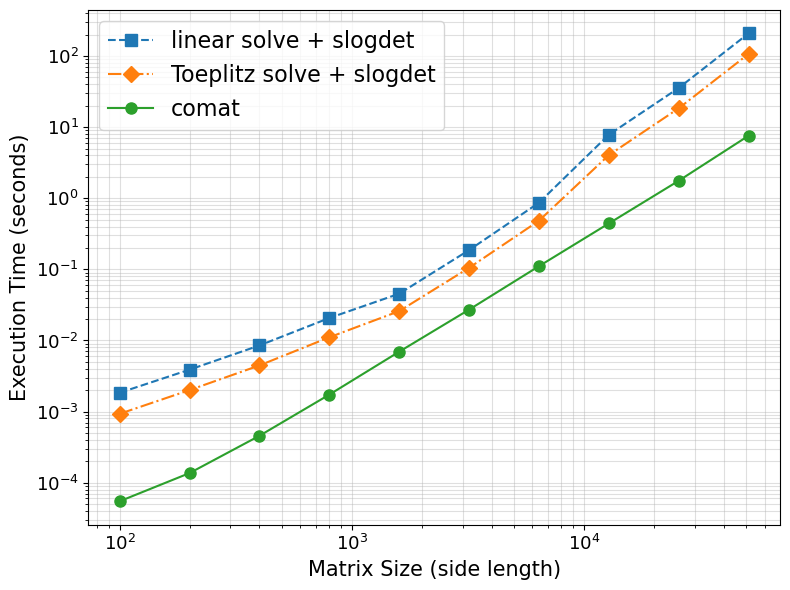

In [11]:


# Visualization
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(size_list, times_bf, 's--', color='#1f77b4', 
        markersize=8, label='linear solve + slogdet')
ax.plot(size_list, times_slog, 'D-.', color='#ff7f0e',
        markersize=8, label='Toeplitz solve + slogdet')
ax.plot(size_list, times_comat, 'o-', color='#2ca02c',
        markersize=8, label='comat')
# ax.plot(size_list, times_comat2, 'v--', color='#d62728',
#         markersize=8, label='comat2')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Matrix Size (side length)', fontsize=15)
ax.set_ylabel('Execution Time (seconds)', fontsize=15)
#ax.set_title('LogDet Quadratic Form Algorithm Comparison', fontsize=14)
ax.grid(True, which='both', alpha=0.4)
ax.legend(fontsize=16)
# ticks size
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=11)

# Annotate fastest method
# min_time = min([min(times_bf), min(times_slog), min(times_comat)])
# ax.annotate('comat', xy=(size_list[-1], times_comat[-1]),
#             xytext=(0.7, 0.9), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('logdet_quad_comparison.pdf')
plt.show()